# The Code

In [43]:

import random
a = 4        # a = alpha
b = 1        # b = beta 

NODES = 14    # Number of nodes
INVALID =  0.001  # very small          
channel = 7   # channel capacity per link
cha = 0    
ph = 0          # SOME CONSTANTS
iterations = 200  



distance_links = [[INVALID for i in range(NODES)] for j in range(NODES)]
distance_links[0][1] = 7
distance_links[1][0] = 7
distance_links[1][2] = 8
distance_links[2][1] = 8
distance_links[0][2] = 9
distance_links[2][0] = 9
distance_links[3][0] = 9
distance_links[0][3] = 9
distance_links[1][7] = 5
distance_links[7][1] = 5
distance_links[4][3] = 8
distance_links[3][4] = 8
distance_links[5][4] = 6
distance_links[4][5] = 6
distance_links[5][2] = 4
distance_links[2][5] = 4
distance_links[4][6] = 8
distance_links[6][4] = 8
distance_links[4][5] = 7
distance_links[5][4] = 7
distance_links[5][8] = 3
distance_links[8][5] = 3
distance_links[5][9] = 2
distance_links[9][5] = 2
distance_links[6][7] = 8
distance_links[7][6] = 8
distance_links[7][10] = 9
distance_links[10][7] = 9
distance_links[8][10] = 4
distance_links[10][8] = 4
distance_links[10][13] = 5
distance_links[13][10] = 5
distance_links[10][12] = 8
distance_links[12][10] = 8
distance_links[12][11] = 9
distance_links[11][12] = 9
distance_links[11][13] = 3
distance_links[13][11] = 3
distance_links[13][9] = 6
distance_links[13][9] = 6
distance_links[11][3] = 8


distance_links[3][11] = 8
distance_links[9][12] = 3
distance_links[12][9] = 3


# distance of each link is given here 





phchannel_links = [[INVALID for i in range(NODES)] for j in range(NODES)]



phchannel_links[0][1] = ph
phchannel_links[1][0] = ph
phchannel_links[1][2] = ph
phchannel_links[2][1] = ph
phchannel_links[0][2] = ph
phchannel_links[2][0] = ph
phchannel_links[3][0] = ph
phchannel_links[0][3] = ph
phchannel_links[1][7] = ph
phchannel_links[7][1] = ph
phchannel_links[4][3] = ph
phchannel_links[3][4] = ph
phchannel_links[5][4] = ph
phchannel_links[4][5] = ph
phchannel_links[5][2] = ph
phchannel_links[2][5] = ph
phchannel_links[4][6] = ph
phchannel_links[6][4] = ph
phchannel_links[4][5] = ph
phchannel_links[5][4] = ph
phchannel_links[5][8] = ph
phchannel_links[8][5] = ph
phchannel_links[5][9] = ph
phchannel_links[9][5] = ph
phchannel_links[6][7] = ph
phchannel_links[7][6] = ph
phchannel_links[7][10] = ph
phchannel_links[10][7] = ph
phchannel_links[8][10] = ph
phchannel_links[10][8] = ph
phchannel_links[10][13] = ph
phchannel_links[13][10] = ph
phchannel_links[10][12] = ph
phchannel_links[12][10] = ph
phchannel_links[12][11] = ph
phchannel_links[11][12] = ph
phchannel_links[11][13] = ph
phchannel_links[13][11] = ph
phchannel_links[13][9] = ph
phchannel_links[13][9] = ph
phchannel_links[11][3] = ph
phchannel_links[3][11] = ph
phchannel_links[9][12] = ph
phchannel_links[12][9] = ph





def next_node(s):
    nxt = []
    for i in range(NODES):
        if(distance_links[s][i] != INVALID):
            nxt.append(i)
    return nxt




def find_simple_paths(start, end):
    visited = set()
    visited.add(start)

    nodestack = list()
    indexstack = list()
    current = start
    i = 0

    while True:
        # get a list of the neighbors of the current node
        neighbors = next_node(current)

        # find the next unvisited neighbor of this node, if any
        while i < len(neighbors) and neighbors[i] in visited: 
            i += 1

        if i >= len(neighbors):

            
            visited.remove(current)
            if len(nodestack) < 1: 
                break  
            current = nodestack.pop()
            i = indexstack.pop()
        elif neighbors[i] == end:

            yield nodestack + [current, end]

            i += 1
        else:
           
            nodestack.append(current)
            indexstack.append(i+1)
            visited.add(neighbors[i])
            current = neighbors[i]
            i = 0




def solution(sour,dest):

    block = 0
    l = []
    for path in find_simple_paths(sour, dest): 
        l.append(path)       

    k = 0
    for i in range(len(l)):
        su = 0
        for j in range(1,len(l[i])):
            su += (distance_links[l[i][j-1]][l[i][j]])

        k += su
    # print k   

    dist_prob = []
    avail_ratio = []
    probability = []
    for i in range(len(l)):
        s = 0
        su = 0
        for j in range(1,len(l[i])):



            if(phchannel_links[l[i][j-1]][l[i][j]] >channel):
                s = 0
            else:

                s += (channel - phchannel_links[l[i][j-1]][l[i][j]])
                su += (distance_links[l[i][j-1]][l[i][j]])
        dist_prob.append(1 - su/(1.0*k))
        x = s/(1.0*(channel*(len(l[i])-1)))
        avail_ratio.append(x)
    for m in range(len(dist_prob)):
        z = (pow(avail_ratio[m],a))*(pow(dist_prob[m],b))

        probability.append(z)

        # print s
    for i in range(len(probability)):
        if(probability[i]  == max(probability)):

            z =  l[i]
            # print z
            for w in range(1,len(z)):

                phchannel_links[z[w]][z[w-1]] += 1
                if(phchannel_links[z[w]][z[w-1]] > channel):
                    block += 1
                    phchannel_links[z[w]][z[w-1]] = INVALID
                    distance_links[z[w]][z[w-1]] = INVALID
                    


    return block


i = 0 
pablock = 0
while(i<iterations):
    so = random.randint(0,(NODES-1))

    
    de = random.randint(0,(NODES-1))
    if(so != de):
        pablock += solution(so,de)


    i += 1
print("Path Blocked")
print(pablock)


Path Blocked
117


##   Shown above is the Output

-----------------------------

--------------------------------------

### Table denoting the number of blockings (considering only the best possible path) for different channel capacities and different request set numbers.
### Best possible path means path where both congestion and shortest distance is taken into consideration
---------------------------------------------------



### a > b  ->  Higher priority is Congestion
### a = b  ->  Same priority for both congestion and distance
### a < b   -> Higher Priority is  shortest distance

--------------------------------------------------------------------

|Capacity|  Number of Request Set   | a>b  | a = b  | a<b  
|:---:|:---:|:---:|:---:|:-------:|
|5 |  100   | 52   | 61  |  72        | 
|5 |  150   | 83  | 95  |  117      | 
|5|  200   | 123  | 136  | 155  | 
|------|-----|-----|-------|------|
| 6|  100   |  41 | 48  |  56 | 
|6 |  150   | 65   | 78  | 84  | 
|6|  200   | 87  | 105  |  123  | 
|------|-----|-----|-------|------|
|7 |  100   | 30   | 36  | 39  | 
|7|  150   | 51  | 59  |  71 | 
|7|  200   | 78  |  98 | 112  | 

### Each number inside the box under a>b, a+b, a<b denotes the number of blockings that occurred

---------------------------------------------------

### Plotting  Results

-------------------

#                                a > b


* **Plotting between blockings and number of request sets for a given channel capacity**

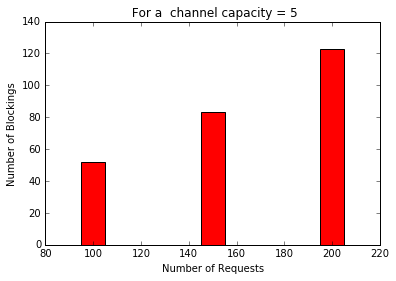

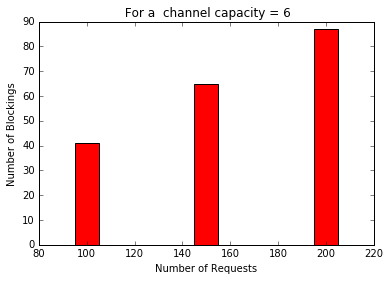

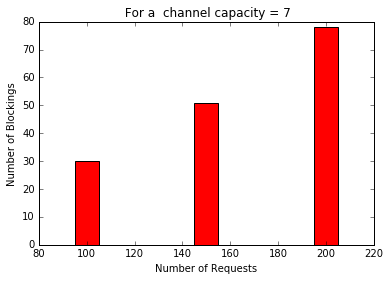

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For a  channel capacity = 5')
plt.bar([95,145,195] ,[52,83,123],width=10,color = 'r')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Blockings')
plt.show()


%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For a  channel capacity = 6')
plt.bar([95,145,195] ,[41,65,87],width=10,color = 'r')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Blockings')
plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For a  channel capacity = 7')
plt.bar([95,145,195] ,[30,51,78],width=10,color = 'r')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Blockings')
plt.show()

* **Plotting between blockings and channel capacity for given number of request set**

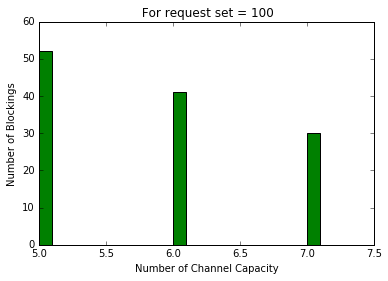

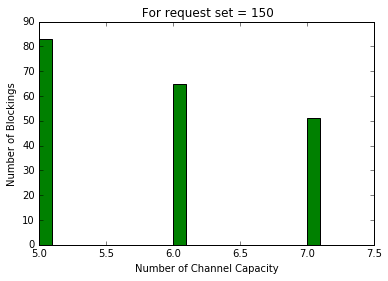

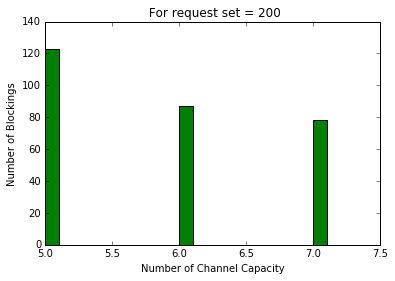

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For request set = 100')
plt.bar([5,6,7] ,[52,41,30],width = 0.1,color = 'g')
plt.xlabel('Number of Channel Capacity')
plt.ylabel('Number of Blockings')
plt.show()


%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For request set = 150')
plt.bar([5,6,7] ,[83,65,51],width = 0.1,color = 'g')
plt.xlabel('Number of Channel Capacity')
plt.ylabel('Number of Blockings')
plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For request set = 200')
plt.bar([5,6,7] ,[123,87,78],width = 0.1,color = 'g')
plt.xlabel('Number of Channel Capacity')
plt.ylabel('Number of Blockings')
plt.show()

----------------------------------------

--------------------

#                                a = b

* **Plotting between blockings and number of request sets for a given channel capacity**

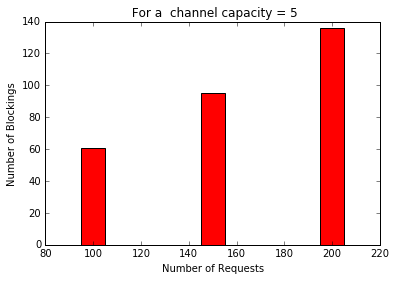

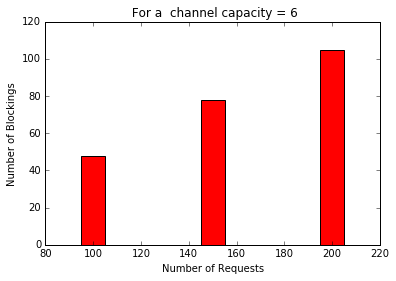

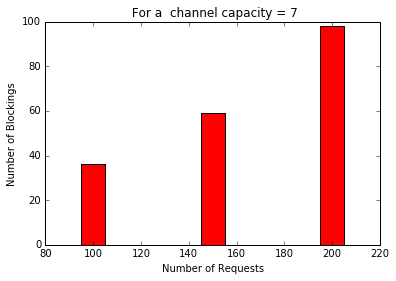

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For a  channel capacity = 5')
plt.bar([95,145,195] ,[61,95,136],width=10,color = 'r')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Blockings')
plt.show()


%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For a  channel capacity = 6')
plt.bar([95,145,195] ,[48,78,105],width=10,color = 'r')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Blockings')
plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For a  channel capacity = 7')
plt.bar([95,145,195] ,[36,59,98],width=10,color = 'r')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Blockings')
plt.show()

* **Plotting between blockings and channel capacity for given number of request set**

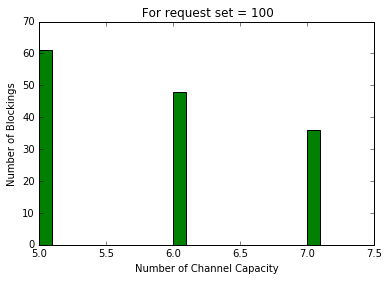

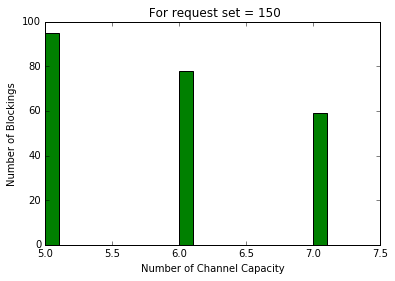

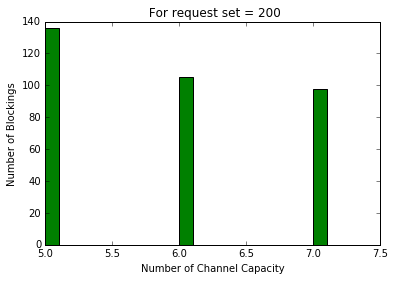

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For request set = 100')
plt.bar([5,6,7] ,[61,48,36],width = 0.1,color = 'g')
plt.xlabel('Number of Channel Capacity')
plt.ylabel('Number of Blockings')
plt.show()


%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For request set = 150')
plt.bar([5,6,7] ,[95,78,59],width = 0.1,color = 'g')
plt.xlabel('Number of Channel Capacity')
plt.ylabel('Number of Blockings')
plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For request set = 200')
plt.bar([5,6,7] ,[136,105,98],width = 0.1,color = 'g')
plt.xlabel('Number of Channel Capacity')
plt.ylabel('Number of Blockings')
plt.show()

--------------------

#                                a < b

* **Plotting between blockings and number of request sets for a given channel capacity**

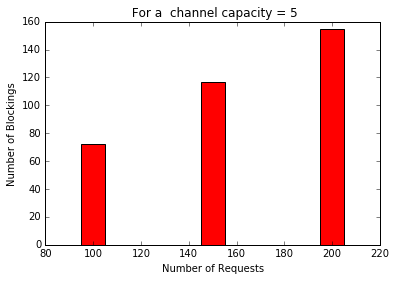

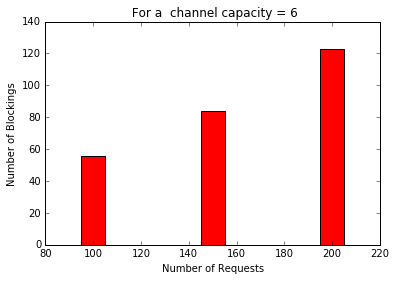

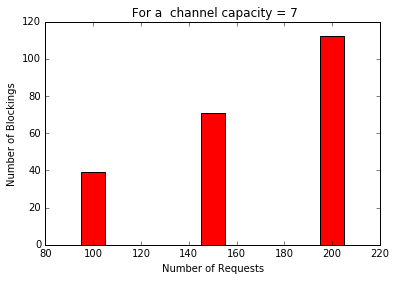

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For a  channel capacity = 5')
plt.bar([95,145,195] ,[72,117,155],width=10,color = 'r')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Blockings')
plt.show()


%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For a  channel capacity = 6')
plt.bar([95,145,195] ,[56,84,123],width=10,color = 'r')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Blockings')
plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For a  channel capacity = 7')
plt.bar([95,145,195] ,[39,71,112],width=10,color = 'r')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Blockings')
plt.show()

* **Plotting between blockings and channel capacity for given number of request set**

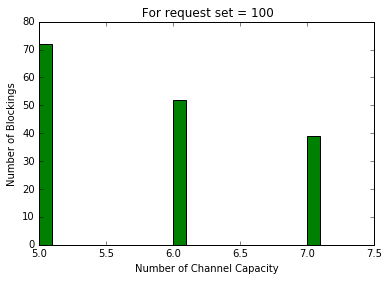

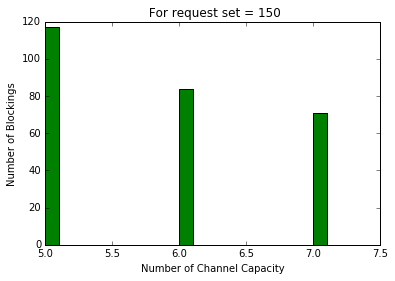

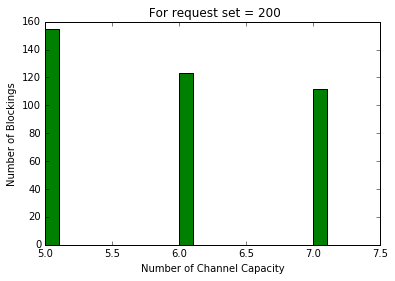

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For request set = 100')
plt.bar([5,6,7] ,[72,52,39],width = 0.1,color = 'g')
plt.xlabel('Number of Channel Capacity')
plt.ylabel('Number of Blockings')
plt.show()


%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For request set = 150')
plt.bar([5,6,7] ,[117,84,71],width = 0.1,color = 'g')
plt.xlabel('Number of Channel Capacity')
plt.ylabel('Number of Blockings')
plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For request set = 200')
plt.bar([5,6,7] ,[155,123,112],width = 0.1,color = 'g')
plt.xlabel('Number of Channel Capacity')
plt.ylabel('Number of Blockings')
plt.show()

### Checking for blocking under different values of a and b for a given request set and channel capacity

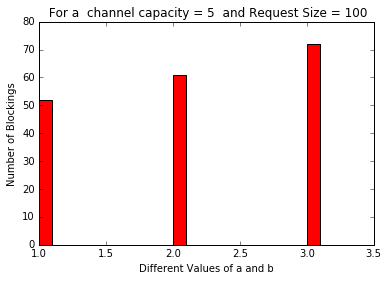

Left bar a > b       Middle bar a = b       Right bar a < b


In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title(' For a  channel capacity = 5  and Request Size = 100' )
plt.bar([1,2,3] ,[52,61,72],width=0.1,color = 'r')
plt.xlabel('Different Values of a and b')
plt.ylabel('Number of Blockings')
plt.show()

print("Left bar a > b       Middle bar a = b       Right bar a < b")

